In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

## Load data files

In [40]:
subjects = pd.read_csv("data/Subjects.csv")
relationships = pd.read_csv("output/relationships.csv")

# Subject / node attributes
politics = pd.read_csv("data/Politics.csv")
health = pd.read_csv("data/Health.csv")

# Mobile phone data
calls = pd.read_csv("data/Calls.csv")
sms = pd.read_csv("data/SMS.csv", encoding = "ISO-8859-1")

## Exploration of survey data

This is an exploration of provided subject attributes, meaningful and informative attributes are selected for further analysis.

### Distribution of subjects by school year

In [41]:
subjects.head()

,user_id,year_school,floor
0,1,GRT / Other,f282.2
1,2,Freshman,f282.4
2,3,Sophomore,f282.4
3,4,Sophomore,f282.1
4,5,Freshman,f282.3


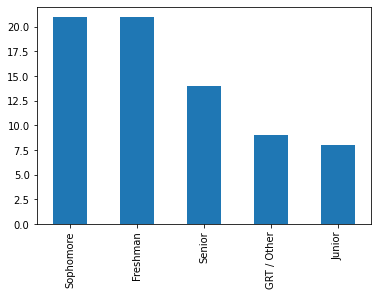

In [42]:
subjects["year_school"].value_counts().plot(kind='bar')

### Distribution of political views
Political views often polarize or bring together people. The survey data includes questionnaires on subjects' views on numerious political topics. Due to the small size of subjects, this project focuses only on the most prominent /divisive features: subject's degree of interest in politics and preferred political party.

In [43]:
politics.head()

,user_id,interested_in_politics,preferred_party,likelihood_of_voting,voting_for_today,preferred_party_details,liberal_or_conservative,survey.month,did_vote_in_election,not_voted_preferred_candidate,voted_preferred_candidate,approve_obama_president,approve_congress,approve_obama_economy
0,55,Very interested,Independent,I will most likely vote,Probably John McCain,Republican Party,Slightly conservative,2008.09,NaN,NaN,NaN,NaN,NaN,NaN
1,36,Slightly interested,Republican,I don't know whether or not I will vote,Definitely John McCain,Strong Republican,Conservative,2008.09,NaN,NaN,NaN,NaN,NaN,NaN
2,39,Somewhat interested,Democrat,NaN,Probably Barack Obama,Not very strong Democrat,Slightly liberal,2008.09,NaN,NaN,NaN,NaN,NaN,NaN
3,37,Not at all interested,Democrat,I will most likely not vote,Probably Barack Obama,Not very strong Democrat,Extremely liberal,2008.09,NaN,NaN,NaN,NaN,NaN,NaN
4,72,Very interested,Democrat,I will definitely vote,Definitely Barack Obama,Strong Democrat,Liberal,2008.09,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
politics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        456 non-null    int64  
 1   interested_in_politics         455 non-null    object 
 2   preferred_party                204 non-null    object 
 3   likelihood_of_voting           136 non-null    object 
 4   voting_for_today               137 non-null    object 
 5   preferred_party_details        140 non-null    object 
 6   liberal_or_conservative        141 non-null    object 
 7   survey.month                   456 non-null    float64
 8   did_vote_in_election           68 non-null     object 
 9   not_voted_preferred_candidate  30 non-null     object 
 10  voted_preferred_candidate      38 non-null     object 
 11  approve_obama_president        185 non-null    object 
 12  approve_congress               185 non-null    obj

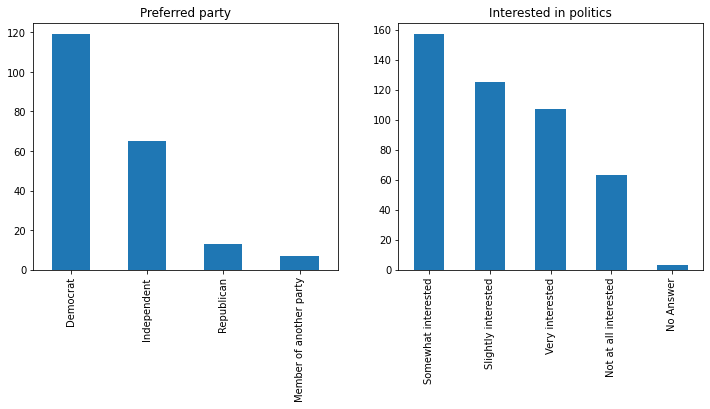

In [45]:
plt.figure(1)
ax1 = plt.subplot(221)
politics["preferred_party"].value_counts().plot(kind='bar', title="Preferred party", figsize=(12, 10))

ax2 = plt.subplot(222)
politics["interested_in_politics"].value_counts().plot(kind='bar', title="Interested in politics", figsize=(12, 10))

### Distribution of subjects' general health
Diet type and the exercise habits can be indicative of a person's moods and social circles. This section briefly explores the health surveys included in the data.


In [46]:
health.head()

,user_id,current_weight,current_height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month
0,55,140.0,69.0,0.0,0.0,Below average,2.0,0.0,Never,2008.09
1,36,150.0,67.0,2.0,1.0,Below average,3.0,3.0,Never,2008.09
2,39,105.0,66.0,0.0,2.0,Average,1.0,0.0,Never,2008.09
3,37,220.0,77.0,2.0,5.0,Very healthy,5.0,5.0,Never,2008.09
4,72,135.0,62.0,0.0,1.0,Unhealthy,0.0,0.0,Never,2008.09


In [47]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 385 non-null    int64  
 1   current_weight          382 non-null    float64
 2   current_height          129 non-null    float64
 3   salads_per_week         382 non-null    float64
 4   veggies_fruits_per_day  381 non-null    float64
 5   healthy_diet            382 non-null    object 
 6   aerobic_per_week        381 non-null    float64
 7   sports_per_week         381 non-null    float64
 8   current_smoking         382 non-null    object 
 9   survey.month            385 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 30.2+ KB


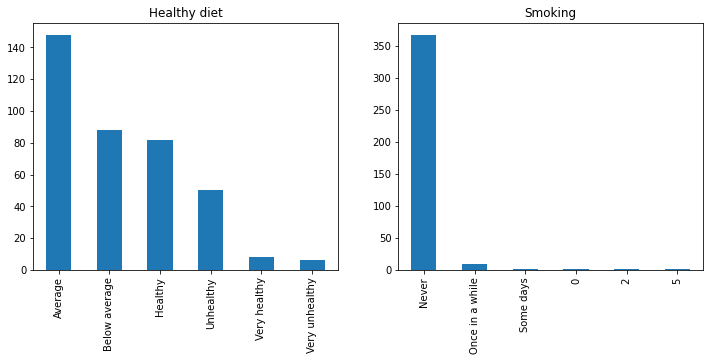

In [48]:
plt.figure(1)
ax1 = plt.subplot(221)
health["healthy_diet"].value_counts().plot(kind='bar', title="Healthy diet", figsize=(12, 10))

ax2 = plt.subplot(222)
health["current_smoking"].value_counts().plot(kind='bar', title="Smoking", figsize=(12, 10))

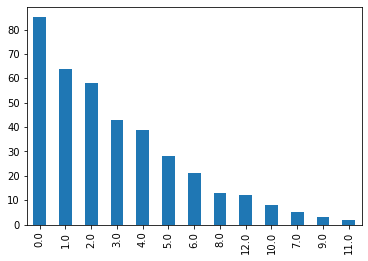

In [49]:
# Create a new column by summing up weekly aerobic and sports activity numbers
health["exercise"] = health["aerobic_per_week"] + health["sports_per_week"]
health["exercise"].value_counts().plot(kind='bar')

## Cleaning and merging subject attributes
Most informative and meaningful attributes are selected in order to be used in the social network analysis. The selected attributes are:
- Politics
    - Interest in politics
    - Preferred party
- Health
    - Healthy diet
    - Exercise per week
- School year

In [50]:
# Filter attributes
politics = politics[["user_id", "interested_in_politics", "preferred_party", "survey.month"]]
health = health[["user_id", "healthy_diet", "exercise", "survey.month"]]
subjects = subjects[["user_id", "year_school"]]

# Print survey dates
print(health["survey.month"].unique())
print(politics["survey.month"].unique())

[2008.09 2008.1  2008.12 2009.03 2009.04 2009.06]
[2008.09 2008.1  2008.11 2008.12 2009.03 2009.04 2009.06]


**Note:**
Survey dates are stored as float numbers and 10/2018 is incorrectly stored as 2008.1


In [51]:
# Merge all attributes using the user ids
attributes = pd.merge(politics, health, on=["user_id", "survey.month"], how="outer")
subjects = pd.merge(subjects, attributes, on="user_id", how="outer")

attributes = attributes[attributes["survey.month"].notnull()]

# Fix datetime issues
subjects["survey.month"] = subjects["survey.month"].astype(str)
subjects["year"] = subjects["survey.month"].str[:4]
subjects["month"] = subjects["survey.month"].str[5:]
subjects.loc[subjects["month"]=="1", "month"] = "10"
subjects["survey.month"] =  subjects["year"] + "-" + subjects["month"]
subjects = subjects.drop(columns=["month", "year"])
subjects.head()

,user_id,year_school,interested_in_politics,preferred_party,survey.month,healthy_diet,exercise
0,1,GRT / Other,Slightly interested,Democrat,2008-09,Very healthy,7.0
1,1,GRT / Other,Somewhat interested,Independent,2008-10,Very healthy,5.0
2,1,GRT / Other,Somewhat interested,Independent,2008-11,NaN,NaN
3,1,GRT / Other,Somewhat interested,NaN,2008-12,Very healthy,4.0
4,1,GRT / Other,Slightly interested,NaN,2009-03,Very healthy,5.0


In [52]:
# Save attributes as csv file
subjects.to_csv('output/subject_attributes.csv')

## Exploring the social network

In [53]:
relationships.head()

,Unnamed: 0,id.A,id.B,survey.date,social_status
0,0,47,2,2008-09-09,CloseFriend
1,1,2,2,2008-09-09,CloseFriend
2,2,57,2,2008-09-09,CloseFriend
3,3,73,2,2008-09-09,Friend
4,4,55,2,2008-09-09,Friend


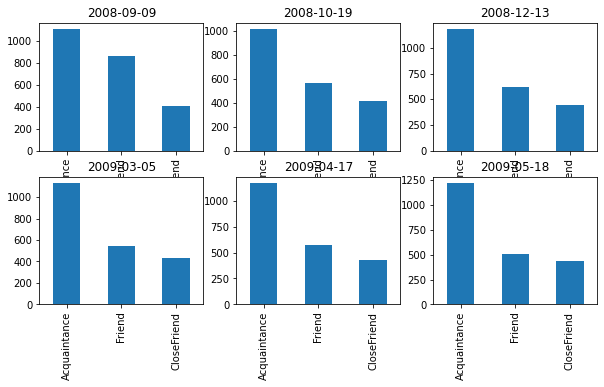

In [54]:
# Drop the second index column
relationships = relationships.drop(relationships.columns[0], axis=1)

plt.figure(1)
plt_num = 331

# Plot the distribution of relationship status for each survey
for date in relationships["survey.date"].unique():
    sub_df = relationships[relationships["survey.date"]==date]
    plt.subplot(plt_num)
    sub_df["social_status"].value_counts().plot(
        kind='bar', 
        title=date,
        figsize=(10, 8))
    plt_num += 1

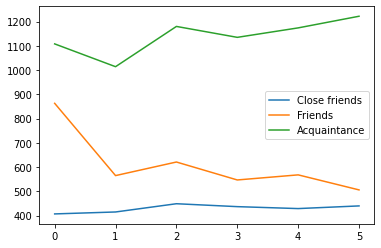

In [26]:
# Change in relationship statistics over time
close_fr, fr, acq, dates = [], [], [], []

survey_dates = relationships['survey.date'].unique().tolist()
for date in survey_dates:
    df = relationships[relationships['survey.date']==date]
    close_fr.append(df["social_status"].value_counts().CloseFriend)
    fr.append(df["social_status"].value_counts().Friend)
    acq.append(df["social_status"].value_counts().Acquaintance)
    dates.append(date)
    
plt.plot(close_fr )
plt.plot(fr)
plt.plot(acq)
plt.legend(["Close friends", "Friends", "Acquaintance"])

In [27]:
survey_dates

['2008-09-09',
 '2008-10-19',
 '2008-12-13',
 '2009-03-05',
 '2009-04-17',
 '2009-05-18']

## Exploration of mobile data
This section explores the connection between mobile correspondeses and relationship status

In [28]:
calls.head()

,user_id,time_stamp,duration,dest_user_id_if_known,dest_phone_hash
0,19.0,2008-10-02 22:04:28,15,NaN,2088297235
1,19.0,2008-10-02 22:03:57,17,NaN,2088297235
2,19.0,2008-10-03 00:42:55,421,NaN,2939471263
3,19.0,2008-10-03 00:42:06,0,NaN,2088297235
4,19.0,2008-10-03 03:47:31,47,18.0,3620995333


In [29]:
sms.head()

,user.id,time,incoming,dest.user.id.if.known,dest.phone.hash
0,61,2008-01-01 15:00:25,0,1.0,3502965008
1,61,2008-01-01 15:00:25,0,61.0,3480933661
2,61,2008-01-01 15:00:25,1,1.0,3502965008
3,61,2008-01-01 15:00:25,1,NaN,177622
4,61,2008-01-01 15:00:25,1,61.0,3480933661


In [30]:
# Remove hash number
calls = calls.drop(columns=["dest_phone_hash"])
sms = sms.drop(columns=["dest.phone.hash"])

# Remove null values
calls = calls[calls["dest_user_id_if_known"].notnull()]
sms = sms[sms["dest.user.id.if.known"].notnull()]

# Convert time_stamp / time to datetime type
calls["time_stamp"] = pd.to_datetime(calls["time_stamp"])
sms["time"] = pd.to_datetime(sms["time"])

# Aggregate date to monthly value
calls["time_stamp"] = calls["time_stamp"].dt.to_period('M')
sms["time"] = sms["time"].dt.to_period('M')

In [31]:
# Filter out sms data collected prior to the first survey date
sms = sms[sms["time"] >= "2008-09"]

# Convert destination id to integer
calls["dest_user_id_if_known"] = calls["dest_user_id_if_known"].astype(int)
sms["dest.user.id.if.known"] = sms["dest.user.id.if.known"].astype(int)

# Eliminate self loops
calls = calls[calls["user_id"] != calls["dest_user_id_if_known"]]
sms = sms[sms["user.id"] != sms["dest.user.id.if.known"]]

### Computing the total call times between subjects

In [33]:
calls = calls.groupby(["user_id", "time_stamp", "dest_user_id_if_known"])["duration"].agg('sum').reset_index()

### Computing the total number sms exchanges

In [34]:
sms_dict = {}
for index, row in sms.iterrows():
    if row["user.id"] not in sms_dict:
        sms_dict[row["user.id"]] = {}
        sms_dict[row["user.id"]][row["time"]] = {}
    else:
        if row["time"] not in sms_dict[row["user.id"]]:
            sms_dict[row["user.id"]][row["time"]] = {}
    
    if row["dest.user.id.if.known"] not in sms_dict[row["user.id"]][row["time"]]:
        sms_dict[row["user.id"]][row["time"]][row["dest.user.id.if.known"]] = 0
    
        
    if row["incoming"] == 1:
        sms_dict[row["user.id"]][row["time"]][row["dest.user.id.if.known"]] += 1
    else:
        if row["dest.user.id.if.known"] not in sms_dict:
            sms_dict[row["dest.user.id.if.known"]] = {}
            sms_dict[row["dest.user.id.if.known"]][row["time"]] = {}
        else:
            if row["time"] not in sms_dict[row["dest.user.id.if.known"]]:
                sms_dict[row["dest.user.id.if.known"]][row["time"]] = {}
            
            if row["user.id"] not in sms_dict[row["dest.user.id.if.known"]][row["time"]]:
                sms_dict[row["dest.user.id.if.known"]][row["time"]][row["user.id"]] = 0
            sms_dict[row["dest.user.id.if.known"]][row["time"]][row["user.id"]] += 1

In [35]:
source, dest, date, n_sms = [], [], [], []
for s in sms_dict:
    for d in sms_dict[s]:
        for t in sms_dict[s][d]:
            source.append(s)
            date.append(d)
            dest.append(t)
            n_sms.append(sms_dict[s][d][t])

sms = pd.DataFrame(zip(source, dest, date, n_sms), columns =["user.id", "dest.id", "date", "n_sms"])

### Call and SMS distributions

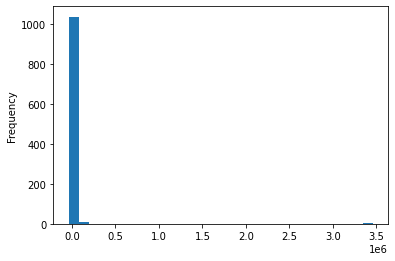

In [36]:
calls["duration"].plot.hist(bins=30)

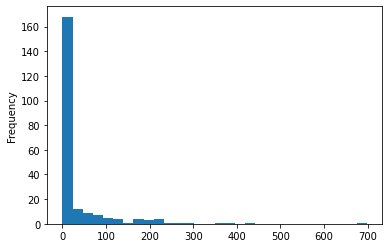

In [37]:
sms["n_sms"].plot.hist(bins=30)

In [38]:
calls.rename(columns={"user_id": "user.id", "dest_user_id_if_known": "dest.id", "time_stamp": "date"}, inplace=True)
calls_sms = pd.merge(calls, sms, on=["user.id", "dest.id", "date"], how="outer")
calls_sms.head()

,user.id,date,dest.id,duration,n_sms
0,1.0,2008-10,37,32783.0,2.0
1,1.0,2008-10,61,3460965.0,432.0
2,1.0,2008-11,61,100349.0,178.0
3,1.0,2008-12,37,6.0,NaN
4,1.0,2008-12,61,45715.0,300.0


In [123]:
calls_sms.to_csv("output/calls_sms.csv")